In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import requests, gzip, os, hashlib, random

In [2]:
W = 28 # pixels
H = W

In [3]:
# load the mnist dataset
def fetch(url):
    fp = os.path.join("/tmp", hashlib.md5(url.encode('utf-8')).hexdigest())
    try:
        with open(fp, "rb") as f:
            dat = f.read()
    except FileNotFoundError:
        with open(fp, "wb") as f:
            dat = requests.get(url).content
            f.write(dat)
    return np.frombuffer(gzip.decompress(dat), dtype=np.uint8).copy()

X_train = fetch("http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz")[0x10:].reshape((-1, H, W))
y_train = fetch("http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz")[8:]
X_test = fetch("http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz")[0x10:].reshape((-1, H, W))
y_test = fetch("http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz")[8:]

In [4]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

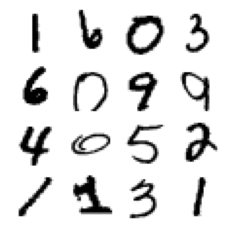

[[1 6 0 3]
 [6 0 9 9]
 [4 0 5 2]
 [1 1 3 1]]


In [5]:
# Show random samples in a grid

grid_n = 4

idx = np.random.choice(len(X_train), grid_n * grid_n)
grid = np.concatenate(X_train[idx, :, :].reshape(grid_n, H * grid_n, W), axis=1)

plt.imshow(grid, cmap='gray_r')
plt.gca().axis('off')
plt.show()

print(y_train[idx].reshape(grid_n, grid_n).T)

In [6]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [7]:
X_train_skl = X_train.reshape(-1, W*H) / 255
X_test_skl = X_test.reshape(-1, W*H) / 255

In [8]:
clf = MLPClassifier(hidden_layer_sizes=(200, 50),
                    verbose=True).fit(X_train_skl, y_train)

Iteration 1, loss = 0.34895146
Iteration 2, loss = 0.13582183
Iteration 3, loss = 0.09187546
Iteration 4, loss = 0.06815936
Iteration 5, loss = 0.05252599
Iteration 6, loss = 0.04168935
Iteration 7, loss = 0.03280007
Iteration 8, loss = 0.02620897
Iteration 9, loss = 0.02091347
Iteration 10, loss = 0.01819185
Iteration 11, loss = 0.01394449
Iteration 12, loss = 0.01255788
Iteration 13, loss = 0.01084643
Iteration 14, loss = 0.00832555
Iteration 15, loss = 0.00923687
Iteration 16, loss = 0.00932120
Iteration 17, loss = 0.00443366
Iteration 18, loss = 0.00776703
Iteration 19, loss = 0.00708051
Iteration 20, loss = 0.00836084
Iteration 21, loss = 0.00485898
Iteration 22, loss = 0.00465131
Iteration 23, loss = 0.00814454
Iteration 24, loss = 0.00605719
Iteration 25, loss = 0.00170161
Iteration 26, loss = 0.00090088
Iteration 27, loss = 0.00062396
Iteration 28, loss = 0.00057018
Iteration 29, loss = 0.00054659
Iteration 30, loss = 0.00053405
Iteration 31, loss = 0.00050931
Iteration 32, los

In [9]:
y_pred = clf.predict(X_test_skl)

In [10]:
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy: {acc * 100} %')

Accuracy: 97.36 %


In [14]:
n_plot = 8

idx_correct = random.sample( list(np.where(y_test == y_pred)[0]), k=n_plot) 
idx_wrong = random.sample( list(np.where(y_test != y_pred)[0]), k=n_plot) 

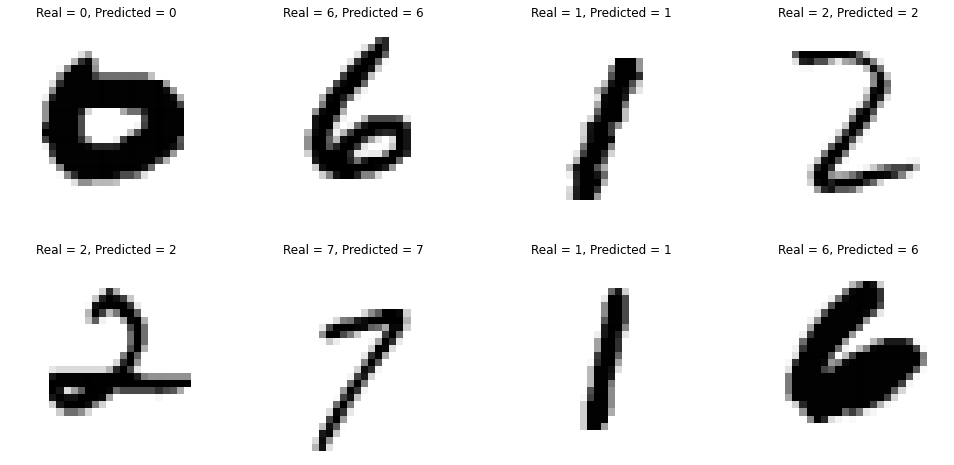

In [15]:
# CORRECT EXAMPLES
fig, ax = plt.subplots(2, n_plot//2, figsize=(17, 8))
for i, a in zip(idx_correct, ax.flat):
    a.imshow(X_test[i, :, :], cmap='gray_r')
    a.set_title(f'Real = {y_test[i]}, Predicted = {y_pred[i]}')
    a.axis('off')
plt.show()

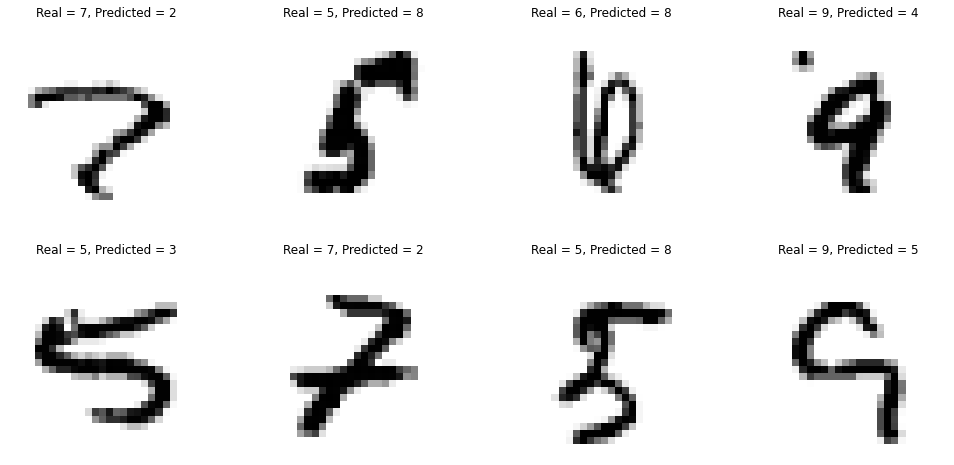

In [16]:
# WRONG EXAMPLES
fig, ax = plt.subplots(2, n_plot//2, figsize=(17, 8))
for i, a in zip(idx_wrong, ax.flat):
    a.imshow(X_test[i, :, :], cmap='gray_r')
    a.set_title(f'Real = {y_test[i]}, Predicted = {y_pred[i]}')
    a.axis('off')
plt.show()